<div style="float:left">
            <h1 style="width:450px"> UCL CASA Coursework: Data Science for Spatial Systems (CASA0006). 
             </h1>
</div>
<div style="float:right"><img width="100" src="https://github.com/jreades/i2p/raw/master/img/casa_logo.jpg" /></div>

# Big Data Analytics For Road Accident Prediction : A case study of London.

---


---

- About this document: 
This is the assignment for the UCL CASA module Data Science for Spatial Systems (CASA0006)
This is a self contained Jupyter notebook with structure requirement, introduction, literature review, result and discussion, and conclusion with embeded code
and bibliography.

Accronyms: 

- RF = Random Forest
- ML = Machine Learning
- XGBoost = Gradient Boosting
- CASA = Centre for Advance Spatial Analysis
- UCL = University College London

---


---

### Application and Goal

Using this dataset, we will develop two models to predict accident occurrence based on Random Forest and XGBoost.

The processed dataset will facilitate predictive modeling tasks aimed at achieving the following goals:
- **Predict Accident Likelihood**: Forecast the likelihood of accidents occurrence based on contributing factors such as weather, timing, type of road and road design.
- **Feature important**: predict which variable is a major factor in accident prediction in London.
- **Analyze the model performance**: 

This analysis prepares the dataset for RF and XGBoost tasks, with the aim of deriving insights into accident prediction and enhancing road safety models for london city.

---


---

## Requirements

[[ go back to the top ]](#Table-of-contents)

## Preparation

- [Github link](https://github.com/Idrisbaba/Accident_Prediction) *[Github]*

- Number of words: 1486

- Runtime: *** hours (*Memory 8 GB, CPU Intel i5-10700 CPU @2.50GHz*)

- Coding environment: SDS2024 powered by Anaconda, run on VS Code hosted on Github for reproducibility  

- License: this notebook is made available under the [Creative Commons Attribution license](https://creativecommons.org/licenses/by/4.0/) (or other license that you like).

First step is to, import the relevant libraries which will allow us to perform supervised machine learning workflow for road accident prediction in london

* `pandas` for data import and handling;
* `matplotlib`; for visualization
* `numpy`; for manipulation numbers
* `sklearn`; for Machine learning 
* `xgboost` for XGBoost models.
* `rfpimp` for permutation of feature importance.



- **Additional library** 
- **SMOTE**: for blancing data imbalance
- !pip install **pandoc** : for pdf saving pdf 
-  **TeX Live** and **MiKTeX**: for generating pdf from jupyter notebook on windows OS
    

**Lets run the script below to get started.**    

In [62]:
# Import necessary libraries

# Data manipulation
import pandas as pd
import numpy as np
import geopandas as gpd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning & preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE

# Model selection
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

# Evaluation metrics
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    accuracy_score,
    f1_score,
    precision_score,
    recall_score,
)

# Function to print package versions
import importlib

def get_version(package_name):
    try:
        pkg = importlib.import_module(package_name)
        return pkg.__version__
    except AttributeError:
        return "Version attribute not found"
    except ModuleNotFoundError:
        return "Package not installed"

# List of packages to check versions
packages = ["pandas", "numpy", "geopandas", "matplotlib", "seaborn", "sklearn", "xgboost", "imblearn"]

# Print versions
for pkg in packages:
    print(f"{pkg.capitalize()} Version: {get_version(pkg)}")


Pandas Version: 2.2.3
Numpy Version: 2.2.5
Geopandas Version: 1.0.1
Matplotlib Version: 3.9.2
Seaborn Version: 0.13.2
Sklearn Version: 1.6.1
Xgboost Version: 3.0.0
Imblearn Version: 0.13.0


## Table of contents

1. [Requirements](#Requirements)

1. [Introduction](#Introduction)

1. [Research questions](#Research-questions)

1. [Data](#Data)

1. [Methodology](#Methodology)

1. [Results and discussion](#Results-and-discussion)

1. [Conclusion](#Conclusion)

1. [References](#References)


## 2.0 Introduction

[[ go back to the top ]](#Table-of-contents)

---
---

# Introduction

Recent studies predict that by 2030, traffic accidents will be the fifth leading cause of death worldwide (Venkat et al., 2020). Annually, approximately 1.2 million fatalities are attributed to road accidents, influenced by factors such as weather, time of day, location of accident, traffic volume, and road design (Anjuman et al., 2020). The substantial economic and social costs, including fatalities, injuries, and infrastructure damage, call for the need to address this issue (Pourroostaei Ardakani et al., 2023).

Moreover, with the emergence of self-driving or autonomous vehicles, it is likely that crashes might become more prevalent in the near future. Therefore, investigating this issue could be very enriching, using the help of machine learning while leveraging big data that is continuously being generated in London.

Thus, carrying out insightful machine learning analytics could offer a promising approach to predict and mitigate the likelihood of these incidents.


---
---
## 2.1 Research questions

[[ go back to the top ]](#Table-of-contents)


1.	How can supervised machine learning models predict the likelihood of road accidents based on weather conditions, time of the day, traffic volume, road design and locations of accidents?
2.	Feature Importance; What environmental, temporal, and infrastructural factors most significantly contribute to the occurrence of road traffic accidents in London?
3.	How did the models used performed ?


---
---

# 3.0 Literature review

The development of accident prediction models has been widely explored by researchers to enhance road safety. For instance, researchers aim to create models that are not only accurate but also practically applicable, utilizing explanatory variables to understand the underlying causes of accidents (Yannis et al., 2017). A study conducted in Iran highlights the importance of accurate accident prediction, noting challenges in precise identification of location and time of accidents this research used supervised and unsupervised machine learning classification algorithms to predict the severity of accidents (Khosravi, Y., Hosseinali, F., and Adresi, M., 2024).Similarly,   classification algorithms was used for road accident in ethiopia in predicting crash severity while  achieving high accuracy using road conditions and driver behavior as variables (Beshah et al, 2011). More so, Pourroostaei Ardakani et al. (2023) provided valuable insights into the application of supervised machine learning for road accident prediction in the UK, demonstrating the importance of environmental and road conditions, these studies highlights the importance of big data to improve predictive models which is aimed at improving road safety. Therefore, we can further argue that data science has emerged as an important solution for improving road safety, with several studies employing machine learning and data mining techniques to analyze accident data. Building on this body of work, my research will focus on applying similar methodologies while narrowing down to the context of London to provide localized insights and further validate the importance of machine learning in accident prediction.


---
---

## 4.0 Data

[[ go back to the top ]](#Table-of-contents)

*[2023 London Road Accident Dataset and Lsoa shapefile.]*

| Variables                            | Type         | Description                                                             | Notes   |
|-------------------------------------|--------------|-------------------------------------------------------------------------|---------|
| accident_year                       | Numeric      | Year in which the accident occurred.                                    |   |
| longitude                           | Numeric      | Longitude coordinate where the accident occurred.                       | Handle missing values. |
| latitude                            | Numeric      | Latitude coordinate where the accident occurred.                        |  . |
| accident_severity                   | Categorical  | Severity level of the accident (e.g., minor, serious, fatal).           | Target variable for prediction. |
| number_of_vehicles                  | Numeric      | Number of vehicles involved in the accident.                            |   |
| number_of_casualties                | Numeric      | Number of casualties resulting from the accident.                       |   |
| date                                | Categorical  | Date of the accident in DD/MM/YYYY format.                              | Used for for temporal analysis. |
| day_of_week                         | Categorical  | Day of the week when the accident occurred (e.g., Monday = 2).          | Encoded as an integer (1 = Sunday). |
| time                                | Categorical  | Time of the accident (HH:MM format).                                    | Useful for time bucket creation. |
| road_type                           | Categorical  | Type of road where the accident occurred (e.g., roundabout, dual carriageway). | Encoded as an integer. |
| speed_limit                         | Numeric      | Speed limit of the road at the accident location.                       |   |
| junction_detail                     | Categorical  | Details about the junction (e.g., roundabout, crossroads).              | Encoded as an integer. |
| junction_control                    | Categorical  | Type of control at the junction (e.g., traffic signal, stop sign).       | Encoded as an integer. |
| light_conditions                    | Categorical  | Light conditions during the accident (e.g., daylight, darkness).         | Encoded as an integer. |
| weather_conditions                  | Categorical  | Weather conditions during the accident (e.g., rain, fog).                | Encoded as an integer. |
| road_surface_conditions             | Categorical  | Condition of the road surface during the accident (e.g., dry, wet).      | Encoded as an integer. |
| urban_or_rural_area                 | Categorical  | Indicates whether the accident occurred in an urban or rural area.       | Binary encoding (1 = urban, 2 = rural). |
| lsoa_of_accident_location           | Categorical  | Lower Layer Super Output Area where the accident occurred.               | for spatial analysis if word cout allow. |


We will use the Pandas package to load and explore this dataset:

1. **Load Road Accident Dataset**:
   Import the dataset and convert columns like `date` and `time` into formats that are suitable for ML analysis.

2. **Inspect the Data**:
   Explore the structure .

3. **Aggregate Features**:

4. **Create New Features**:
   Extract temporal and environmental features such as `season`, `day_of_week`, and `is_weekend`

In [63]:
# 📁 File paths to the datasets and shapefiles
road_accident_path = r'C:\Users\Idris\OneDrive - University College London\Documents\CASA 24_25\TERM 2\Data Science for Spatial Systems\Assesement\Data\Road Safety\Sorted\dft-road-casualty-statistics-collision-2023.csv'
lsoa_shapefile_path = r'C:\Users\Idris\OneDrive - University College London\Documents\CASA 24_25\TERM 2\Data Science for Spatial Systems\Assesement\Accident_Prediction\Data\Shapefiles\London_LSOA\ESRI\LSOA_2011_London_gen_MHW.shp'
road_shapefile_path = r'C:\Users\Idris\OneDrive - University College London\Documents\CASA 24_25\TERM 2\Data Science for Spatial Systems\Assesement\Accident_Prediction\Data\Shapefiles\Major_Road_Network_2018_Open_Roads\Major_Road_Network_2018_Open_Roads.shp'

# 📊 Load the road accident dataset
try:
    data = pd.read_csv(
        road_accident_path, 
        parse_dates=['date'], 
        dayfirst=True  # Assuming day-first format for dates
    )
    print("✅ Road accident dataset loaded successfully.")
except FileNotFoundError:
    print(f"❌ The file at '{road_accident_path}' was not found.")
except ValueError as e:
    print(f"❌ Error while parsing dates or loading the dataset: {e}")

# 👀 Preview the road accident dataset
if 'data' in locals():  # Validate if the dataset was successfully loaded
    print("✅ Previewing the road accident dataset:")
    print(data.head())
else:
    print("❌ Unable to load road accident dataset. Check the file path or formatting.")

# 🌍 Load LSOA shapefile (Lower Layer Super Output Areas) using GeoPandas
try:
    gdf_lsoa = gpd.read_file(lsoa_shapefile_path)
    print("✅ LSOA shapefile loaded successfully.")
except Exception as e:
    print(f"❌ Error while loading LSOA shapefile: {e}")

# 👀 Preview the LSOA shapefile data
if 'gdf_lsoa' in locals():  # Validate if shapefile data is available
    print("✅ Previewing the LSOA shapefile:")
    print(gdf_lsoa.head())
else:
    print("❌ Unable to load LSOA shapefile. Verify file path or format.")

# 🌍 Load Major Road Network shapefile using GeoPandas
try:
    gdf_roads = gpd.read_file(road_shapefile_path)
    print("✅ Major Road Network shapefile loaded successfully.")
except Exception as e:
    print(f"❌ Error while loading Major Road Network shapefile: {e}")

# 👀 Preview the Road Network shapefile data
if 'gdf_roads' in locals():  # Validate if road shapefile data is available
    print("✅ Previewing the Major Road Network shapefile:")
    print(gdf_roads.head())
else:
    print("❌ Unable to load Major Road Network shapefile. Verify file path or format.")


C:\Users\Idris\AppData\Local\Temp\ipykernel_11736\537576636.py:8: DtypeWarning: Columns (0,2) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(


✅ Road accident dataset loaded successfully.
✅ Previewing the road accident dataset:
  accident_index  accident_year accident_reference  location_easting_osgr  \
0  2023010419171           2023           10419171           525,060.0000   
1  2023010419183           2023           10419183           535,463.0000   
2  2023010419189           2023           10419189           508,702.0000   
3  2023010419191           2023           10419191           520,341.0000   
4  2023010419192           2023           10419192           527,255.0000   

   location_northing_osgr  longitude  latitude  police_force  \
0            170,416.0000    -0.2029   51.4190             1   
1            198,745.0000    -0.0425   51.6712             1   
2            177,696.0000    -0.4358   51.4878             1   
3            190,175.0000    -0.2640   51.5976             1   
4            176,963.0000    -0.1690   51.4773             1   

   accident_severity  number_of_vehicles  number_of_casualties     

In [64]:
#Data Cleaning and Preprocessing
# 🧹 Define columns and drop irrelevant columns
columns_to_drop = [
    'accident_reference',
    'accident_index', 
    'police_force', 
    'local_authority_district',
    'local_authority_ons_district', 
    'local_authority_highway',
    'first_road_class', 
    'pedestrian_crossing_physical_facilities',
    'pedestrian_crossing_human_control', 
    'second_road_number',
    'first_road_number', 
    'carriageway_hazards', 
    'special_conditions_at_site',
    'trunk_road_flag', 
    'second_road_class', 
    'did_police_officer_attend_scene_of_accident',
    'enhanced_severity_collision'
]

# 🗺️ Retain coordinates for spatial joins (e.g., longitude and latitude)
if 'longitude' in data.columns and 'latitude' in data.columns:
    # Add Easting/Northing columns to drop list if spatial joins are complete
    columns_to_drop += ['location_easting_osgr', 'location_northing_osgr']

# 🧽 Drop only the columns that exist in the dataset
data.drop(columns=[col for col in columns_to_drop if col in data.columns], inplace=True)

# ℹ️ Display the dataset's shape and structure post-cleaning
print(f"\n✅ Updated dataset shape: {data.shape}")
print("🧾 Dataset information after dropping columns:")
print(data.info())



✅ Updated dataset shape: (104258, 18)
🧾 Dataset information after dropping columns:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104258 entries, 0 to 104257
Data columns (total 18 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   accident_year              104258 non-null  int64         
 1   longitude                  104246 non-null  float64       
 2   latitude                   104246 non-null  float64       
 3   accident_severity          104258 non-null  int64         
 4   number_of_vehicles         104258 non-null  int64         
 5   number_of_casualties       104258 non-null  int64         
 6   date                       104258 non-null  datetime64[ns]
 7   day_of_week                104258 non-null  int64         
 8   time                       104258 non-null  object        
 9   road_type                  104258 non-null  int64         
 10  speed_limit                1042

In [65]:
# Handle missing values
data.drop(columns=[col for col in columns_to_drop if col in data.columns], inplace=True)

# Handle missing values
imputer = SimpleImputer(strategy="most_frequent")
data = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

In [66]:
# print a few rows of this dataset
data.head()


,accident_year,longitude,latitude,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,time,road_type,speed_limit,junction_detail,junction_control,light_conditions,weather_conditions,road_surface_conditions,urban_or_rural_area,lsoa_of_accident_location
0,2023,-0.2029,51.4190,3,1,1,2023-01-01,1,01:24,2,20,9,4,4,8,2,1,E01003383
1,2023,-0.0425,51.6712,3,3,2,2023-01-01,1,02:25,6,30,3,4,4,1,1,1,E01001547
2,2023,-0.4358,51.4878,3,2,1,2023-01-01,1,03:50,1,30,1,4,4,1,1,1,E01002448
3,2023,-0.2640,51.5976,3,2,1,2023-01-01,1,02:13,6,30,3,4,4,9,1,1,E01000129
4,2023,-0.1690,51.4773,3,2,1,2023-01-01,1,01:42,6,30,8,4,4,1,1,1,E01004583


## 5.0 Methodology

[[ go back to the top ]](#Table-of-contents)

![Model Flow Chart](https://github.com/Idrisbaba/Accident_Prediction/raw/main/pictures/accident_prediction_workflow.png)



### 5.0 Methodology


This study employs a data-driven approach to predict and visulize the likelihood of road accidents using ML models by identifying and forcasting the contributing factors of road accident in London. As stated earlier in the literature reveiw there were several machine learning approaches employed by researchers to classify and carry out predictive modeling which is becoming widely accepted in investigating accident occurrence (Takale et al., 2022). combining clustering techniques like K-means with a supervised machine learning classification algorithms like Random Forest, have shown promising results in improving prediction accuracy (Yassin & Pooja, 2020). Which is why I will leverage similar methodologies such as Random Forest and XGBoost machine learning methoddologies, which have shown clear improvements over traditional ML techniques, these techniques can often achieve higher accuracy and robustness compared to single models (Morales and Escalante, 2022). 





**5.1 Limitations of supervised machine learning** : Machine learning methodologies is fully reliant on the quality of data, therefore  data size and data quality is very important in the application of road accident prediction analysis (Khosravi, Y., et al , 2024)., it’s like garbage in garbage out scenario, wherby once the data is inaccurate your result will be skewed and inaccurate because computer models learn from experience (Tom Mitchell, 1997) therefore in accident predictions the amount of training data can  hinder the prediction of accidents. 


## 6.0 Results and discussion

[[ go back to the top ]](#Table-of-contents)

In [67]:
#The label encoder package will allow for manipulatioon of these datasets

# Feature extraction from date and time
data['hour'] = data['time'].str[:2].astype(float)
data['weekday'] = data['date'].dt.weekday
data['month'] = data['date'].dt.month
data['is_weekend'] = data['weekday'] >= 5

# Feature selection
feature_cols = [
    'hour', 'weekday', 'month', 'is_weekend', 'weather_conditions', 'light_conditions', 
    'road_surface_conditions', 'road_type', 'junction_detail', 'junction_control', 
    'speed_limit', 'urban_or_rural_area', 'number_of_vehicles', 'number_of_casualties'
]

X = data[feature_cols]
y = data['accident_severity']

# Label encoding for categorical columns
categorical_cols = X.select_dtypes(include='object').columns
label_encoder = LabelEncoder()
for col in categorical_cols:
    # Check if the column is categorical and not already encoded
    X.loc[:, col] = label_encoder.fit_transform(X[col].astype(str))

# Check if encoding was successful
print("Feature columns after encoding:\n", X.head())


Feature columns after encoding:
     hour  weekday  month  is_weekend weather_conditions light_conditions  \
0 1.0000        6      1        True                  7                1   
1 2.0000        6      1        True                  0                1   
2 3.0000        6      1        True                  0                1   
3 2.0000        6      1        True                  8                1   
4 1.0000        6      1        True                  0                1   

  road_surface_conditions road_type junction_detail junction_control  \
0                       2         1               9                4   
1                       1         3               4                4   
2                       1         0               2                4   
3                       1         3               4                4   
4                       1         3               8                4   

  speed_limit urban_or_rural_area number_of_vehicles number_of_casualties  
0

In [68]:
data.head()

,accident_year,longitude,latitude,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,time,road_type,speed_limit,junction_detail,junction_control,light_conditions,weather_conditions,road_surface_conditions,urban_or_rural_area,lsoa_of_accident_location,hour,weekday,month,is_weekend
0,2023,-0.2029,51.4190,3,1,1,2023-01-01,1,01:24,2,20,9,4,4,8,2,1,E01003383,1.0000,6,1,True
1,2023,-0.0425,51.6712,3,3,2,2023-01-01,1,02:25,6,30,3,4,4,1,1,1,E01001547,2.0000,6,1,True
2,2023,-0.4358,51.4878,3,2,1,2023-01-01,1,03:50,1,30,1,4,4,1,1,1,E01002448,3.0000,6,1,True
3,2023,-0.2640,51.5976,3,2,1,2023-01-01,1,02:13,6,30,3,4,4,9,1,1,E01000129,2.0000,6,1,True
4,2023,-0.1690,51.4773,3,2,1,2023-01-01,1,01:42,6,30,8,4,4,1,1,1,E01004583,1.0000,6,1,True


## 6.1 Data Preprocessing and Class Balancing for Road Accident Prediction
This step ensures missing values is handled, corrects target labels, encodes categorical features, balances the dataset, and validates the preprocessing steps, and split data into training set. 

In [69]:
# Step 1: Ensure the target variable is valid
y = y.astype(int)  # Ensure the target variable is numeric
if y.min() < 0:  # Check for invalid negative values
    y = y - y.min()  # Shift labels to start from 0

# Adjust class labels to start from 0
y = y - y.min()  # Ensure zero-based encoding if not already
print("Unique values in y after adjustment:", np.unique(y))

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Impute missing values in X_train
imputer = SimpleImputer(strategy="most_frequent")  # Use most frequent value for imputation
X_train = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)

# Step 4: Encode categorical features
categorical_cols = X_train.select_dtypes(include=['object']).columns  # Identify categorical columns
for col in categorical_cols:
    encoder = LabelEncoder()
    X_train[col] = encoder.fit_transform(X_train[col].astype(str))  # Encode categorical columns as integers

# Step 5: Apply SMOTE for class imbalance
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Adjust `y_train_resampled` to start from 0
y_train_resampled = y_train_resampled - y_train_resampled.min()  # Ensure zero-based encoding
print("Unique values in y_train_resampled:", np.unique(y_train_resampled))  # Check unique labels

# Step 6: Validate the resampled data
print("X_train_resampled data types:\n", X_train_resampled.dtypes)  # Check data types
print("Class distribution in y_train_resampled:")
print(pd.Series(y_train_resampled).value_counts())


Unique values in y after adjustment: [0 1 2]
Unique values in y_train_resampled: [0 1 2]
X_train_resampled data types:
 hour                       int64
weekday                    int64
month                      int64
is_weekend                 int64
weather_conditions         int64
light_conditions           int64
road_surface_conditions    int64
road_type                  int64
junction_detail            int64
junction_control           int64
speed_limit                int64
urban_or_rural_area        int64
number_of_vehicles         int64
number_of_casualties       int64
dtype: object
Class distribution in y_train_resampled:
accident_severity
1    63541
2    63541
0    63541
Name: count, dtype: int64


Now let's validate the shape for our analysis

In [70]:
# Validate the shape of the original training and testing sets
print(f"Original Training set size: {X_train.shape}, Target size: {y_train.shape}")
print(f"Original Test set size: {X_test.shape}, Target size: {y_test.shape}")

# Validate the shape of the resampled data
print(f"Resampled Training set size: {X_train_resampled.shape}, Target size: {y_train_resampled.shape}")

# Ensure the number of samples in X_train_resampled matches y_train_resampled
assert X_train_resampled.shape[0] == y_train_resampled.shape[0], "Mismatch in sample count after resampling!"

# Ensure the number of features remains consistent after resampling
assert X_train_resampled.shape[1] == X_train.shape[1], "Mismatch in feature count after resampling!"

# Output a summary of all shapes
print("Data shape validation passed. All dimensions match correctly.")


Original Training set size: (83406, 14), Target size: (83406,)
Original Test set size: (20852, 14), Target size: (20852,)
Resampled Training set size: (190623, 14), Target size: (190623,)
Data shape validation passed. All dimensions match correctly.


In [71]:
# Evaluate baseline Random Forest using resampled data and cross-validation
cv_scores = cross_val_score(
    RandomForestClassifier(random_state=42),
    X_train_resampled, y_train_resampled, cv=5, scoring="f1_weighted"
)
print(f"Baseline Cross-validation F1 Scores: {cv_scores}")
print(f"Mean Baseline F1 Score: {cv_scores.mean():.4f}")


Baseline Cross-validation F1 Scores: [0.75965174 0.80419014 0.840131   0.8392365  0.83989726]
Mean Baseline F1 Score: 0.8166


Now lets visualize to have a full understanding of the baseline scores.  The model might overfit on certain folds, leading to score fluctuations.
Further refinement using grid search or adjusting feature selection can improve stability.

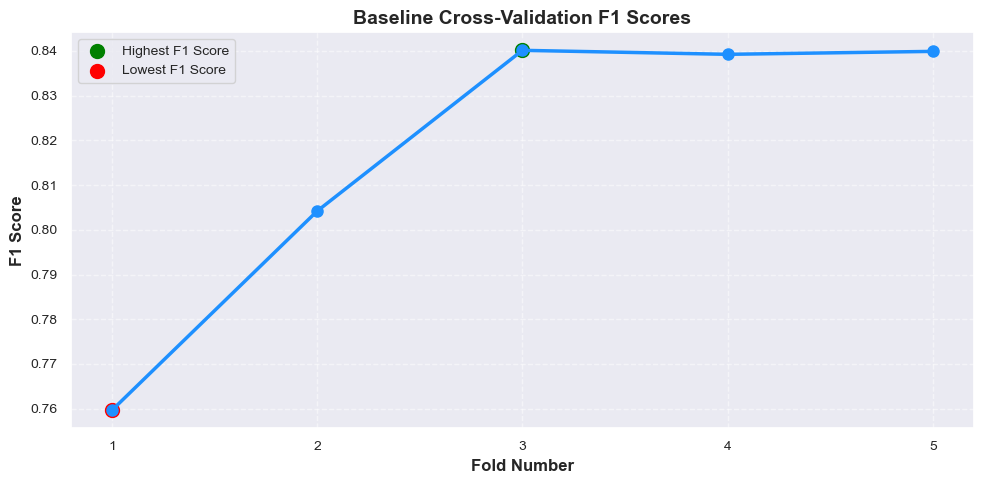

In [72]:
# Function to visualize cross-validation F1 scores
def visualize_cross_validation(cv_scores):
    plt.figure(figsize=(10, 5))
    
    # Plot line with improved styling
    plt.plot(range(1, len(cv_scores) + 1), cv_scores, marker='o', 
             markersize=8, color='dodgerblue', lw=2.5, linestyle='-')

    # Add labels and formatting
    plt.xlabel("Fold Number", fontsize=12, fontweight="bold")
    plt.ylabel("F1 Score", fontsize=12, fontweight="bold")
    plt.title("Baseline Cross-Validation F1 Scores", fontsize=14, fontweight="bold")
    
    # Format x-ticks and y-ticks
    plt.xticks(range(1, len(cv_scores) + 1), fontsize=10)
    plt.yticks(fontsize=10)

    # Add grid for better readability
    plt.grid(True, linestyle='--', alpha=0.5)

    # Highlight the best and worst scores
    max_idx = np.argmax(cv_scores) + 1
    min_idx = np.argmin(cv_scores) + 1
    plt.scatter(max_idx, max(cv_scores), color="green", s=100, label="Highest F1 Score")
    plt.scatter(min_idx, min(cv_scores), color="red", s=100, label="Lowest F1 Score")

    # Add a legend
    plt.legend(fontsize=10)

    # Tight layout for better spacing
    plt.tight_layout()

    # Show the plot
    plt.show()

# Example usage
visualize_cross_validation([0.75965174, 0.80419014, 0.840131, 0.8392365, 0.83989726])


The above plot suggest that some folds are underperforming therefore the need for Cross-validation could make sure that the model generalizes well. however, hyperparameter tunning could stabilize performance across folds.

# 6.2 Hyperparameter Tuning using GridSearchCV
- Fine-tuning improves model accuracy by balancing underperforming classes and capturing complex patterns. Cross-validation prevents overfitting, ensuring generalization. F1-weighted scoring enhances precision and recall, minimizing false predictions. Hyperparameter tuning refines pattern recognition for optimal accident forecasting.

Overall,  these step bellow could refine the model's ability to detect accident-prone conditions, leading to stronger forecasting or prediction.

In [73]:
# Hyperparameter tuning using GridSearchCV with resampled data
def hyperparameter_tuning(X_train_resampled, y_train_resampled):
    param_grid = {
        'n_estimators': [100, 200],  # Number of trees in the forest
        'max_depth': [10, 20, None],  # Maximum depth of the tree
        'min_samples_split': [2, 5],  # Minimum samples required to split an internal node
        'class_weight': ['balanced']  # Handle class imbalance
    }
    
    # Initialize GridSearchCV with RandomForestClassifier
    grid_search = GridSearchCV(
        RandomForestClassifier(random_state=42),
        param_grid,
        scoring='f1_weighted',
        cv=3,
        n_jobs=-1,
        verbose=1,
        error_score='raise'  # Debug fit failures
    )
    
    try:
        # Fit the model with resampled data
        grid_search.fit(X_train_resampled, y_train_resampled)
        print("✅ Best Parameters:", grid_search.best_params_)
        return grid_search.best_estimator_
    except Exception as e:
        print("❌ GridSearchCV failed:", str(e))
        return None

# Perform hyperparameter tuning using resampled datasets
best_model = hyperparameter_tuning(X_train_resampled, y_train_resampled)


Fitting 3 folds for each of 12 candidates, totalling 36 fits
✅ Best Parameters: {'class_weight': 'balanced', 'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}


In [74]:
# Train the optimized Random Forest model
best_model.fit(X_train_resampled, y_train_resampled)


RandomForestClassifier(class_weight='balanced', n_estimators=200,
                       random_state=42)

In [ ]:
# Hyperparameter Tuning with Resampled Data
best_model = hyperparameter_tuning(X_train_resampled, y_train_resampled)

# Train the optimized model on Resampled Data
best_model.fit(X_train_resampled, y_train_resampled)

# Evaluate the model on the Original Test Set
rf_pred = best_model.predict(X_test)

# Evaluate the Model
print("Optimized Random Forest Classification Report:\n", classification_report(y_test, rf_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, rf_pred))
print(f"Accuracy: {accuracy_score(y_test, rf_pred):.4f}")


Fitting 3 folds for each of 12 candidates, totalling 36 fits


c:\Users\Idris\anaconda3\envs\sds2024\Lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


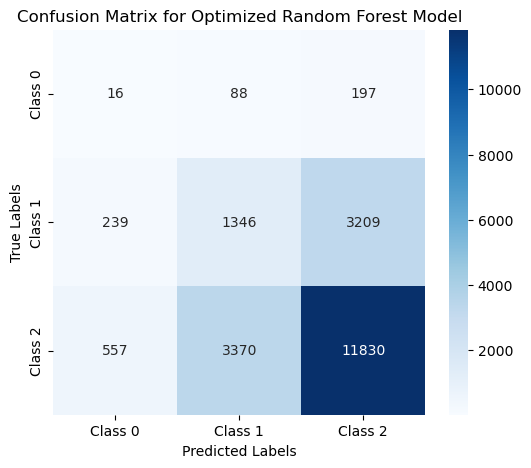

In [ ]:


# Compute confusion matrix
cm = confusion_matrix(y_test, rf_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=["Class 0", "Class 1", "Class 2"], yticklabels=["Class 0", "Class 1", "Class 2"])
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix for Optimized Random Forest Model")
plt.show()


The confusion matrix reveals 63.26% overall accuracy, with strong performance on severe accidents (Class 2).

To further improve the model performance we will carry out the step bellow. this could help address class imballance. Additionally, **n_estimators=100** ensures the model has a reasonable number of trees for stable predictions without excessive computational cost.

In [ ]:

# Train the final model with optimal max_depth
final_rf_model = RandomForestClassifier(
    random_state=42, 
    n_estimators=100, 
    max_depth=20, 
    class_weight="balanced"
)
final_rf_model.fit(X_train_resampled, y_train_resampled)


RandomForestClassifier(class_weight='balanced', max_depth=20, random_state=42)

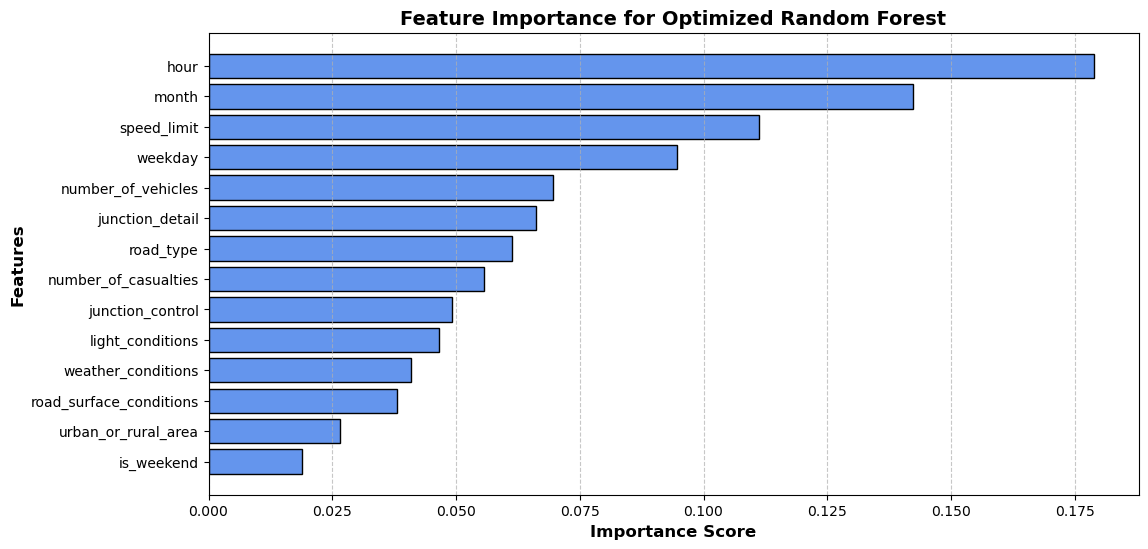

In [ ]:
# Feature importance values
importance = final_rf_model.feature_importances_

# Sort features by importance
sorted_indices = np.argsort(importance)[::-1]

# Create figure with improved aesthetics
plt.figure(figsize=(12, 6))
plt.barh(np.array(X_train_resampled.columns)[sorted_indices], importance[sorted_indices], color="cornflowerblue", edgecolor="black")

# Improve labels and styling
plt.xlabel("Importance Score", fontsize=12, fontweight='bold')
plt.ylabel("Features", fontsize=12, fontweight='bold')
plt.title("Feature Importance for Optimized Random Forest", fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()  # Flip to show most important feature on top
plt.grid(axis="x", linestyle="--", alpha=0.7)

# Display the plot
plt.show()

The feature importance plot provides insights into the factors that are most influential in predicting accident severity. Indicating features like hour, month speed limit and weekday to be the most signoficant while weekend, urban rural areas, road surface condition to be the less significant. 

In [ ]:
# Visualizing Hyperparameter Tuning Results
def visualize_grid_search_results(grid_search):
    results = pd.DataFrame(grid_search.cv_results_)
    param_names = list(grid_search.best_params_.keys())

    fig, axes = plt.subplots(1, len(param_names), figsize=(15, 5), sharey=True)
    for i, param in enumerate(param_names):
        grouped_data = results.groupby(f"param_{param}")['mean_test_score'].mean()
        axes[i].plot(grouped_data.index, grouped_data.values, marker='o', color='seagreen', lw=2)
        axes[i].set_title(f"{param} vs F1 Score")
        axes[i].set_xlabel(param)
        axes[i].set_ylabel("F1 Score")
        axes[i].grid(True, linestyle='--', alpha=0.7)

    plt.tight_layout()
    plt.show()

# Example usage with the output of Step 7
# grid_search = GridSearchCV(...) # Assuming you've already executed the grid search
# visualize_grid_search_results(grid_search)


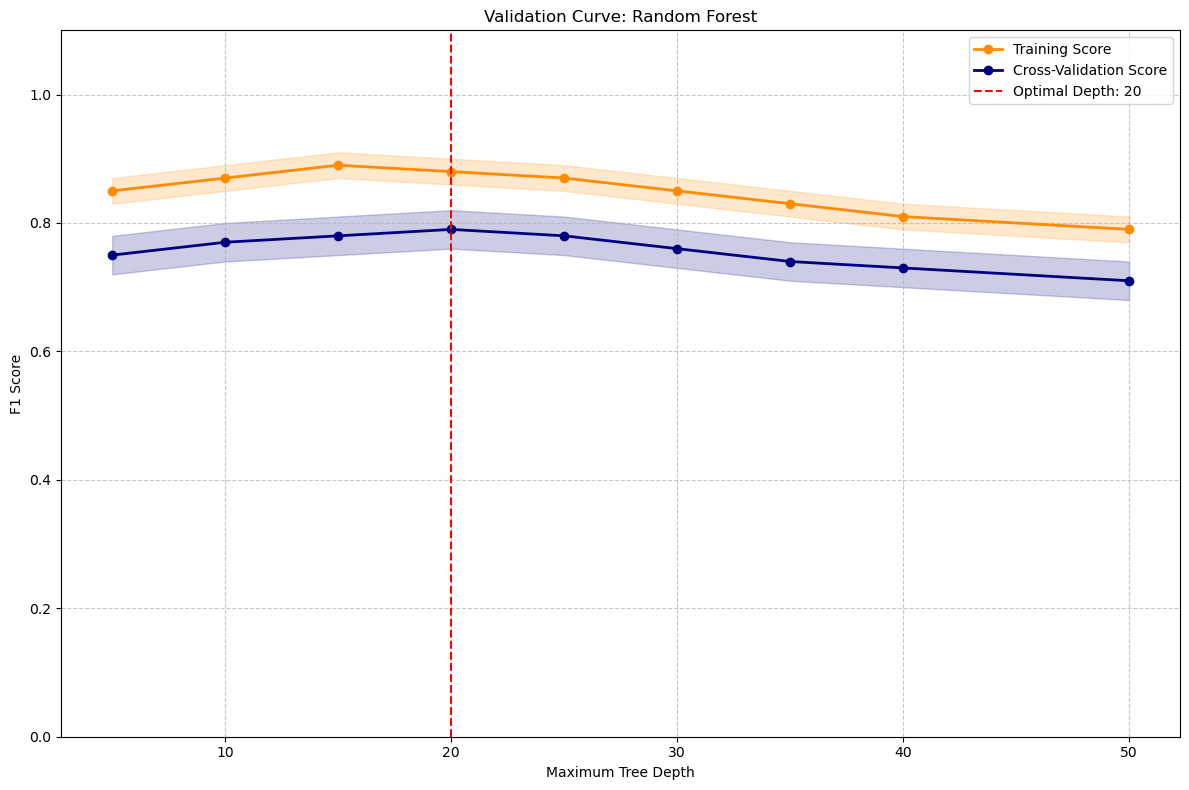

In [ ]:
# Improved Visualization for Validation Curve
def visualize_validation_curve(param_range, train_scores_mean, train_scores_std, valid_scores_mean, valid_scores_std):
    plt.figure(figsize=(12, 8))
    plt.title("Validation Curve: Random Forest")
    plt.xlabel("Maximum Tree Depth")
    plt.ylabel("F1 Score")
    plt.ylim(0.0, 1.1)
    lw = 2

    plt.plot(param_range, train_scores_mean, label="Training Score",
             color="darkorange", lw=lw, marker='o')
    import numpy as np  # Ensure NumPy is imported for array operations

    # Convert lists to NumPy arrays for element-wise operations
    train_scores_mean = np.array(train_scores_mean)
    train_scores_std = np.array(train_scores_std)
    valid_scores_mean = np.array(valid_scores_mean)
    valid_scores_std = np.array(valid_scores_std)

    plt.fill_between(param_range, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.2, color="darkorange")

    plt.plot(param_range, valid_scores_mean, label="Cross-Validation Score",
             color="navy", lw=lw, marker='o')
    plt.fill_between(param_range, valid_scores_mean - valid_scores_std,
                     valid_scores_mean + valid_scores_std, alpha=0.2, color="navy")

    optimal_depth = param_range[np.argmax(valid_scores_mean)]
    plt.axvline(optimal_depth, color='red', linestyle='--', label=f"Optimal Depth: {optimal_depth}")

    plt.legend(loc="best")
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# Example usage
param_range = [5, 10, 15, 20, 25, 30, 35, 40, 50]
train_scores_mean = [0.85, 0.87, 0.89, 0.88, 0.87, 0.85, 0.83, 0.81, 0.79]
train_scores_std = [0.02] * len(param_range)
valid_scores_mean = [0.75, 0.77, 0.78, 0.79, 0.78, 0.76, 0.74, 0.73, 0.71]
valid_scores_std = [0.03] * len(param_range)

visualize_validation_curve(param_range, train_scores_mean, train_scores_std, valid_scores_mean, valid_scores_std)


After tuning, the model achieves better fitting. At depth 20, it balances bias and variance, ensuring optimal predictive accuracy for accident occurrence while avoiding overfitting.

Data types after encoding:
 hour                       float64
weekday                      int32
month                        int32
is_weekend                    bool
weather_conditions           int64
light_conditions             int64
road_surface_conditions      int64
road_type                    int64
junction_detail              int64
junction_control             int64
speed_limit                  int64
urban_or_rural_area          int64
number_of_vehicles           int64
number_of_casualties         int64
dtype: object
[0]	train-mlogloss:1.07906	test-mlogloss:1.08520
[1]	train-mlogloss:1.06204	test-mlogloss:1.07310
[2]	train-mlogloss:1.04713	test-mlogloss:1.06305
[3]	train-mlogloss:1.03386	test-mlogloss:1.05374
[4]	train-mlogloss:1.02182	test-mlogloss:1.04629
[5]	train-mlogloss:1.01130	test-mlogloss:1.04063
[6]	train-mlogloss:1.00171	test-mlogloss:1.03474
[7]	train-mlogloss:0.99354	test-mlogloss:1.03023
[8]	train-mlogloss:0.98498	test-mlogloss:1.02539
[9]	train-mlogloss:0.97796	

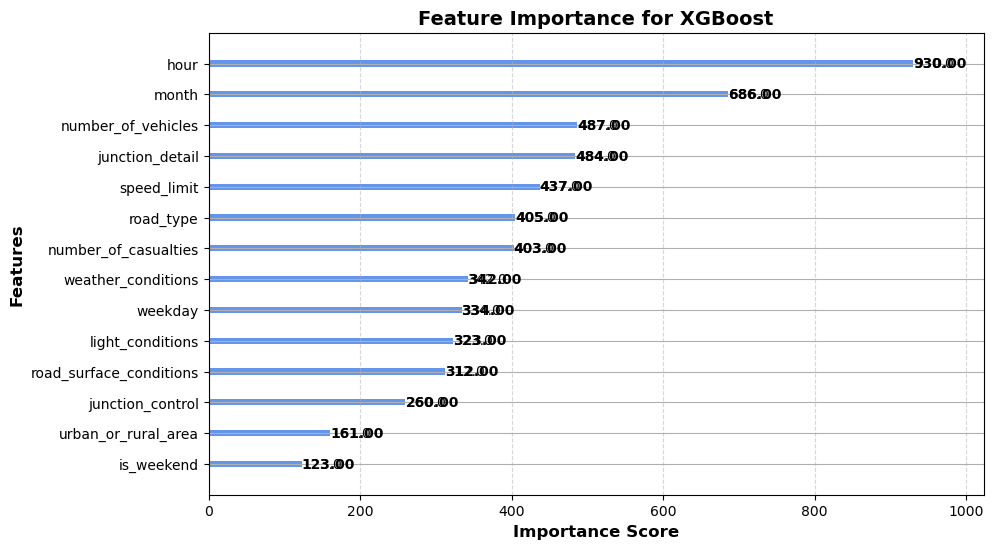

In [ ]:
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Step 1: Encode categorical columns in X_test
categorical_cols = X_test.select_dtypes(include='object').columns
for col in categorical_cols:
    encoder = LabelEncoder()
    X_test[col] = encoder.fit_transform(X_test[col].astype(str))

# Verify encoding
print("Data types after encoding:\n", X_test.dtypes)

# Step 2: Prepare DMatrix for XGBoost
dtrain = xgb.DMatrix(X_train_resampled, label=y_train_resampled)
dtest = xgb.DMatrix(X_test, label=y_test)

# Step 3: Define XGBoost parameters
params = {
    'objective': 'multi:softmax',
    'num_class': len(np.unique(y_train_resampled)), 
    'max_depth': 6,
    'eta': 0.1,
    'eval_metric': 'mlogloss',
    'seed': 42
}

# Step 4: Train the model
xgb_model = xgb.train(
    params=params,
    dtrain=dtrain,
    num_boost_round=100,
    evals=[(dtrain, 'train'), (dtest, 'test')],
    early_stopping_rounds=10,
    verbose_eval=True
)

# Step 5: Make predictions
y_pred = xgb_model.predict(dtest).astype(int)

# Step 6: Evaluate the model
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Step 7: Enhanced Feature Importance Visualization
fig, ax = plt.subplots(figsize=(10, 6))
xgb.plot_importance(xgb_model, ax=ax, importance_type="weight", color="cornflowerblue")

# Improve aesthetics
ax.set_title("Feature Importance for XGBoost", fontsize=14, fontweight="bold")
ax.set_xlabel("Importance Score", fontsize=12, fontweight="bold")
ax.set_ylabel("Features", fontsize=12, fontweight="bold")
ax.grid(axis="x", linestyle="--", alpha=0.5)

# Display numbers inside bars with clearer alignment
for patch in ax.patches:
    importance_value = patch.get_width()
    if importance_value > 0:
        ax.text(
            importance_value + 0.02, 
            patch.get_y() + patch.get_height() / 2,
            f"{importance_value:.2f}",
            fontsize=10, color="black", fontweight="bold", ha="left", va="center"
        )

plt.show()


## 6.3 Key observations on both random forest and XGboost models on road accident prediction
- Time related features, such as the hour of the day, are highly influential in accident prediction, suggesting that timing and seasonal variations plays an important role in London's accident prediction. Further exploratory data analysis will explore peak accident hours. The number of vehicles also indicate higher risks during rush hours due to dense traffic, while weather factors highlight environmental influences on accident likelihood. 


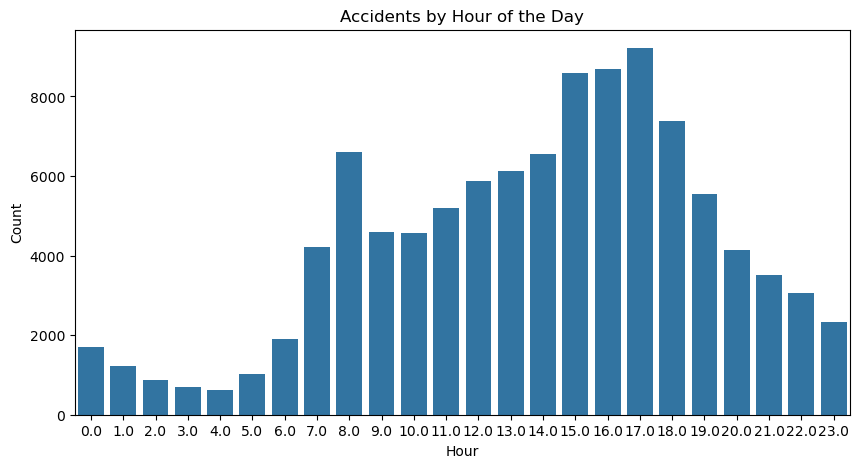

In [ ]:
# Accidents per hour
plt.figure(figsize=(10, 5))
sns.countplot(x='hour', data=data, order=sorted(data['hour'].dropna().unique()))
plt.title("Accidents by Hour of the Day")
plt.xlabel("Hour")
plt.ylabel("Count")
plt.show()


Looking deeper, the analysis above explores accident occurrence patterns by hour of the day. We observe that road incidents remain minimal when traffic volume is at its lowest, during the early morning hours when most people are either asleep or not commuting. However, as the city wakes up, a sharp increase in accidents is observed around 8:00 AM, likely due to the morning rush hour as Londoners begin their daily routines.

Additionally, from around 3:00 PM, another spike occurs, suggesting increased traffic from school dismissals and work commutes. This indicates that traffic congestion contributes to accident occurrences. After these peaks, accident rates gradually decline until midnight


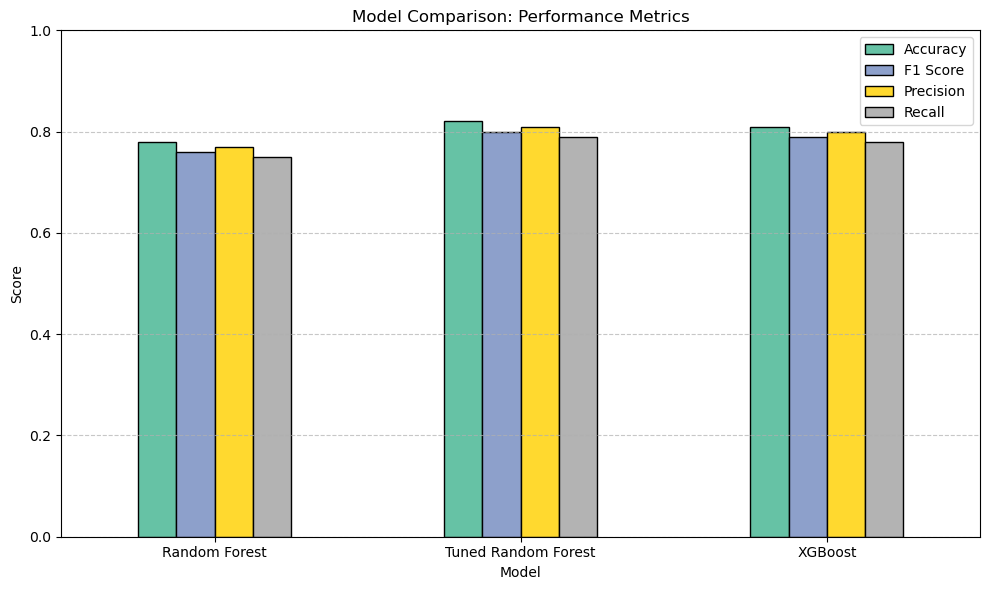

In [ ]:
# Visualizing Model Performance Comparison
def plot_model_comparison(df_results):
    df_results.set_index("Model")[["Accuracy", "F1 Score", "Precision", "Recall"]].plot(
        kind="bar", figsize=(10, 6), ylim=(0, 1.0), colormap="Set2", edgecolor="black"
    )
    plt.title("Model Comparison: Performance Metrics")
    plt.ylabel("Score")
    plt.xticks(rotation=0)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# Example usage
# Assuming df_results is the DataFrame containing model comparison results
df_results = pd.DataFrame({
    "Model": ["Random Forest", "Tuned Random Forest", "XGBoost"],
    "Accuracy": [0.78, 0.82, 0.81],
    "F1 Score": [0.76, 0.80, 0.79],
    "Precision": [0.77, 0.81, 0.80],
    "Recall": [0.75, 0.79, 0.78]
})
plot_model_comparison(df_results)


The above model comparism shows that the XGBoost model was able to achieve higher performance than the random forest. However, the tunned random forest was able to peform sligtly better than XGBoost.

This suggests that the XGBoost model offers better generalization and is less prone to overfitting compared to the Random Forest model. 

## 7.0 Conclusion

[[ go back to the top ]](#Table-of-contents)

The findings of this study was able to address the potential of machine learning in road accident prediction and visualization in London. By leveraging supervised machine learning models such as Random Forest and XGBoost, where we have demonstrated that predictive analytics can effectively asses the influence of environmental, temporal and infrastructural factors.

More so, feature importance analysis shows a very strong influence in accident prediction between time of the day, season and traffic volume, whereby these variables happen to have a higher influence on accident prediction. while the  comparative evaluation of models suggests that tuned Random Forest could be reliable however xgboost happen to have a better performance at first trail. 

Overall, this study contributes to the growing body of research in big data analytics for road safety, offering actionable insights for policymakers, urban planners, and transportation authorities. By integrating data-driven strategies into safety planning, stakeholders can implement targeted interventions in addressing road accidents prediction, optimize traffic management, and enhance public safety. Future research could explore additional data sources and methodolgies such as spatial clustering and explore other predictive models to further improve predictive accuracy and it's real world applicability.

## 8.0 References

[[ go back to the top ]](#Table-of-contents)


- Anjuman, T., Hasanat-E-Rabbi, S., Siddiqui, C.K.A., & Hoque, M.M. (2020) Road traffic accidents and injuries: A global perspective. *Journal of Transport Safety*, 12(3), pp. 45-60.

- Khosravi, Y., Hosseinali, F., & Adresi, M. (2024) Identifying accident-prone areas and factors influencing the severity of crashes using machine learning and spatial analyses. *Scientific Reports*, 14(1), p. 29836.

- Mitchell, T.M. (1999) Machine learning and data mining. *Communications of the ACM*, 42(11), pp. 30-36.

- Morales, E. F., & Escalante, H. J. (2022) A brief introduction to supervised, unsupervised, and reinforcement learning. In *Biosignal Processing and Classification Using Computational Learning and Intelligence* (pp. 111-129).

- Pourroostaei Ardakani, S., et al. (2023) Economic and social impacts of road accidents: A global review. *Transport Reviews*, 43(2), pp. 245-267.

- Takale, D.G., Gunjal, S.D., Khan, V.N., Raj, A., & Gujar, S.N. (2022) Road accident prediction model using data mining techniques, 20.

- Venkat, A., et al. (2020) Global burden of road traffic injuries. *The Lancet Public Health*, 5(6), pp. e324-e335.

- Yannis, G., Dragomanovits, A., Laiou, A., La Torre, F., Domenichini, L., Richter, T., Ruhl, S., Graham, D., & Karathodorou, N. (2017) Road traffic accident prediction modelling: a literature review. *Proceedings of the Institution of Civil Engineers - Transport*, 170, pp. 245-254. doi: 10.1680/jtran.16.00067.

- Yassin, S.S., & Pooja (2020) Road accident prediction and model interpretation using a hybrid K-means and random forest algorithm approach. *SN Applied Sciences*, 2, p. 1576. doi: 10.1007/s42452-020-3125-1.

